# MXNet + Transfer Learning
With TransferLearning Applied

[https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images](https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images)


In [2]:
# 1) download dataset
# 2) load into memory/convert to Torch dataset
# 3) choose transfer model -> resnet18 (44mb)
# 4) freeze original layers
# 5) add custom layers
# 6) train new layers added

In [6]:
!dir venv

 Volume in drive C is Windows
 Volume Serial Number is 50FA-31E7

 Directory of C:\Users\st007742\PycharmProjects\ml-aws-course\venv

18.11.2023  16:16    <DIR>          .
18.11.2023  16:16    <DIR>          ..
18.11.2023  16:07                42 .gitignore
18.11.2023  16:16    <DIR>          etc
18.11.2023  16:07    <DIR>          Lib
18.11.2023  16:07               298 pyvenv.cfg
02.12.2023  14:42    <DIR>          Scripts
18.11.2023  16:17    <DIR>          share
               2 File(s)            340 bytes
               6 Dir(s)  35я369я820я160 bytes free


In [171]:
import torch
from torch import nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

import pickle
from tqdm import tqdm
import os

In [10]:
class_names = ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe',
'Lactarius', 'Russula', 'Suillus']

In [21]:
# lets investigate whats inside:

! dir data\lab07\mushrooms

 Volume in drive C is Windows
 Volume Serial Number is 50FA-31E7

 Directory of C:\Users\st007742\PycharmProjects\ml-aws-course\data\lab07\mushrooms

09.12.2023  16:11    <DIR>          .
09.12.2023  16:11    <DIR>          ..
09.12.2023  16:05    <DIR>          Agaricus
09.12.2023  16:05    <DIR>          Amanita
09.12.2023  16:05    <DIR>          Boletus
09.12.2023  16:06    <DIR>          Cortinarius
09.12.2023  16:06    <DIR>          Entoloma
09.12.2023  16:06    <DIR>          Hygrocybe
09.12.2023  16:06    <DIR>          Lactarius
09.12.2023  16:07    <DIR>          Russula
09.12.2023  16:07    <DIR>          Suillus
               0 File(s)              0 bytes
              11 Dir(s)  35я357я069я312 bytes free


In [31]:
import os
import shutil

def split_train_test(source_dir='./data/lab07/mushrooms', train_dir='./data/lab07-mushrooms-dataset/train', test_dir='./data/lab07-mushrooms-dataset/test'):
    for root, dirs, files in os.walk(source_dir):
        count = 0
        print(len(files))
        l = int(len(files)*0.2)
        for name in files:
            current_filepath = os.path.join(root, name)
            dataset_dir = train_dir if (l < count) else test_dir
            new_filepath = current_filepath.replace(source_dir, dataset_dir)
            try:
                os.makedirs(os.path.dirname(new_filepath))
            except FileExistsError:
                pass
            shutil.move(current_filepath, new_filepath)
            count += 1
    #shutil.rmtree(source_dir)




In [32]:
split_train_test()

0
353
750
1073
836
364
316
1563
1148
311


In [53]:
import torchvision
from torchvision.transforms import v2

TRAIN_FOLDER = './data/lab07-mushrooms-dataset/train/'
TEST_FOLDER = './data/lab07-mushrooms-dataset/test/'

# see https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html for details
transforms = v2.Compose([
        v2.Resize(256, interpolation=v2.InterpolationMode.BILINEAR),
        v2.CenterCrop(224),
        v2.ToTensor(),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

train_dataset = torchvision.datasets.ImageFolder(root = TRAIN_FOLDER, transform = transforms)
test_dataset = torchvision.datasets.ImageFolder(root = TEST_FOLDER, transform = transforms)

C:\Users\st007742\PycharmProjects\ml-aws-course\venv\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [54]:
print(len(train_dataset), len(test_dataset))

5366 1348


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: 0
Label description: Agaricus
<built-in method size of Tensor object at 0x000001D1CBFE1C70>


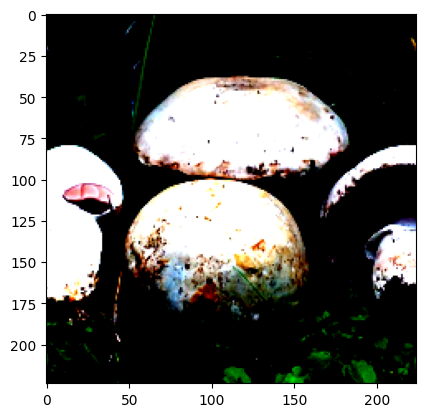

In [59]:
# show sample image, jusst to be sure, the dataset is working...

sample_idx = 123
sample = train_dataset[sample_idx]
data = sample[0]
label = sample[1]

plt.imshow(np.array(data.permute(1, 2, 0)), cmap='gray')
print("Label: {}".format(label))
print("Label description: {}".format(train_dataset.classes[label]))
print(data.size)

In [62]:
# setting device on GPU if available, else CPU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [65]:
import torchvision.models as models

resnet18 = models.resnet18(weights='IMAGENET1K_V1')


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\st007742/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:04<00:00, 10.5MB/s]


In [ ]:
print(resnet18)

In [113]:
# test model as is
image, label = test_dataset[56]
label = test_dataset.classes[label]

predicted_label = resnet18(image[None, :])
print(get_imagenet_label(predicted_label))

bucket, pail


In [130]:
predicted_label

tensor([[-0.5768, -0.4680, -0.6670, -1.5566, -0.6667, -0.1592, -0.4957,  0.5156,
          0.3778, -0.6423, -1.1001, -0.8939, -0.4137, -1.0739, -1.2163, -0.6841,
         -0.9517, -0.4922, -0.6980, -0.7272, -1.6966, -0.8983, -1.5254,  0.1518,
         -1.0496, -1.1605, -0.7279, -1.1944, -0.9667, -0.3373, -0.7796, -0.7411,
         -0.4484, -0.5413, -0.4369, -0.5023,  0.6149, -0.6780, -0.3465,  0.1119,
         -0.5984, -0.8186, -1.0227, -0.2712, -0.5865, -0.4224, -0.6868, -0.4346,
         -1.1764, -0.9936, -0.4714,  0.4289, -0.2675, -0.6195,  0.0256, -1.0744,
         -0.3523, -1.4097, -0.3800, -0.4068,  0.8666,  0.2933, -0.0416,  0.1896,
         -0.6974, -0.1350, -0.1512, -0.2401, -0.7122, -1.0193, -1.4731,  0.0725,
         -1.3898, -0.2835, -1.1358, -1.4196,  0.0234, -0.4727,  0.1553,  0.2164,
         -0.9442, -1.7652, -0.1168, -0.7639, -0.5172, -0.2040,  0.0678,  0.2685,
         -0.0157, -0.8145, -1.2251, -1.1937, -1.9392, -0.4483,  0.0193, -2.2243,
         -0.5750, -0.5111, -

In [108]:
def get_imagenet_label(prediction_idx):

    with open("./data/lab07-mushrooms-dataset/imagenet1000_clsidx_to_labels.txt") as f:
        idx2label = eval(f.read())

    return idx2label[prediction_idx]


In [114]:
def show(image):
    plt.figure()
    plt.imshow(np.array(image.permute(1, 2, 0)))
    plt.show()

In [188]:
def predict_imagenet (model, image, k):
    prediction = model(image[None, :])
    
    top = torch.topk(prediction, k=k)
    print(top)

    for index, probability in zip(top.indices[0], top.values[0]):
        label = get_imagenet_label(index.item())
        print("{}: {:.2f}".format(label, probability.item()))

def predict (model, image, classes, k):
    prediction = model(image[None, :])
    
    top = torch.topk(prediction, k=k)
    print(top)

    for index, probability in zip(top.indices[0], top.values[0]):
        label = classes[index.item()]
        print("{}: {:.2f}".format(label, probability.item()))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.return_types.topk(
values=tensor([[2.6097, 2.1975, 2.1259]], grad_fn=<TopkBackward0>),
indices=tensor([[463, 731, 600]]))
bucket, pail: 2.61
bucket, pail: 2.20
bucket, pail: 2.13


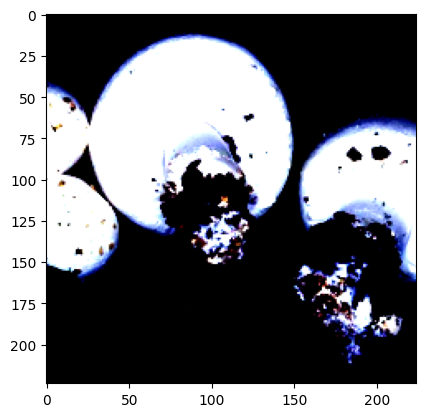

In [164]:
image, _ = test_dataset[0]

predict_imagenet(resnet18, image, 3)
show(image)

In [180]:
for param in resnet18.parameters():
    param.requires_grad = False

In [181]:
# Parameters of newly constructed modules have requires_grad=True by default
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 9)

resnet18 = resnet18.to(device)

# print new model
print(resnet18)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [182]:
# define a train function, model-agnostic, which will be used for further training
def train(net, train_loader, device, num_epochs, learning_rate):
    
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    loss_function = torch.nn.CrossEntropyLoss()
    acc_history = []

    with tqdm(total=len(train_loader)*num_epochs, position=0, leave=True) as pbar:

        for epoch in range(num_epochs):
            running_loss = 0.0
            correct = 0
            total = 0 
            
            for batch_num, (inputs, labels) in enumerate(train_loader):
                # Possibly copy inputs and labels to the GPU
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()

                # Forward pass
                outputs = net(inputs)
                loss = loss_function(outputs, labels)

                # Backpropagation                
                loss.backward()

                # Update
                optimizer.step()

                # Print progress
                running_loss += loss.item()

                # Calculate batch Accuracy
                _, predicted = outputs.max(1)
                batch_total = labels.size(0)
                batch_correct = predicted.eq(labels).sum().item()
                batch_acc = batch_correct/batch_total
                
                pbar.set_description("Epoch: %d, Batch: %2d, Loss: %.2f, Acc: %.2f" % (epoch, batch_num, running_loss, batch_acc))
                pbar.update()

                total += batch_total
                correct += batch_correct

            # Print the evaluation metric and reset it for the next epoch
            acc = correct/total 
            acc_history.append(acc)

        pbar.close()

    return acc_history


def print_history(history, title):
    plt.figure(figsize=(7, 4))
    plt.plot(history)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

In [183]:
# prepare training
BATCH_SIZE = 64
EPOCHS = 2
LR = 0.005

train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE)

hist = train(resnet18, train_dataloader, device, EPOCHS, LR)

Epoch: 1, Batch: 83, Loss: 6542.46, Acc: 0.00: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168/168 [05:48<00:00,  2.07s/it]


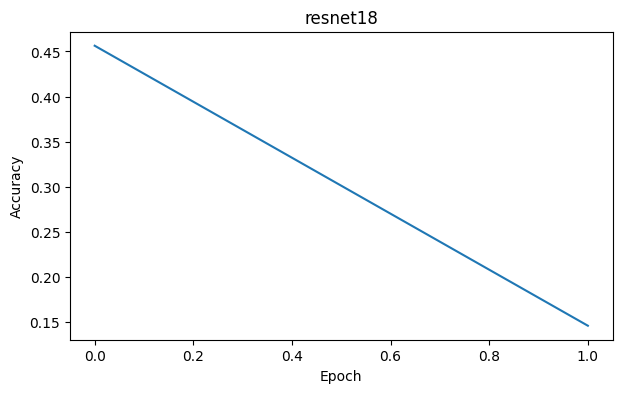

In [187]:
print_history(hist, 'resnet18')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.return_types.topk(
values=tensor([[100.2246]], grad_fn=<TopkBackward0>),
indices=tensor([[7]]))
Russula: 100.22


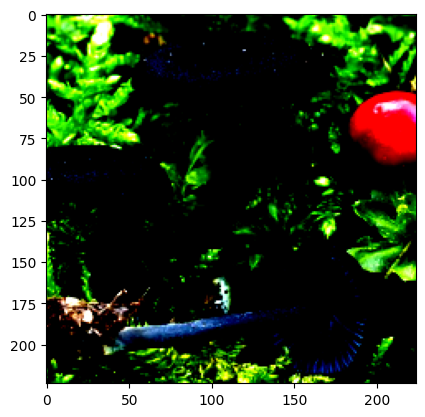

True label:  Entoloma


In [195]:
image, label = test_dataset[654]

predict(resnet18, image, test_dataset.classes, 1)
show(image)
print('True label: ', test_dataset.classes[label])